Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [90]:
df = pd.read_csv('Train.csv')

In [91]:
df.info() # No missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

In [5]:
df.mean() # EDA-part-1

CategoryID                   2.245511
Value                   707020.754379
PropertySize            746822.707124
BillingAmt               10899.514083
AverageBillingAmt          575.486484
CollectedAmt              9763.645487
AverageCollectedAmt       2044.687786
DebtAmt                   9642.500070
WriteOffAmt                602.765327
CollectionRatio             19.536208
DebtBillingRatio            18.632894
TotalElectricityBill      4338.707224
HasID                        0.427634
Label                        0.461424
dtype: float64

In [6]:
df.nunique() # EDA-part-2

AccID                   100476
CategoryID                  12
Category                    12
Value                    10427
PropertySize             14208
BillingAmt               28464
AverageBillingAmt         5610
CollectedAmt             23605
AverageCollectedAmt       9044
DebtAmt                  20453
WriteOffAmt               5099
CollectionRatio           1682
DebtBillingRatio          6485
TotalElectricityBill     11211
HasID                        2
Label                        2
dtype: int64

In [7]:
df.describe() #EDA-part-3

,CategoryID,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
count,100476.000000,1.004760e+05,1.004760e+05,1.004760e+05,100476.000000,1.004760e+05,1.004760e+05,1.004760e+05,1.004760e+05,1.004760e+05,1.004760e+05,1.004760e+05,100476.000000,100476.000000
mean,2.245511,7.070208e+05,7.468227e+05,1.089951e+04,575.486484,9.763645e+03,2.044688e+03,9.642500e+03,6.027653e+02,1.953621e+01,1.863289e+01,4.338707e+03,0.427634,0.461424
std,2.730572,3.047463e+06,5.651558e+06,1.262341e+05,6430.309611,1.201449e+05,3.682487e+04,5.003013e+04,1.440915e+04,5.556991e+03,6.274720e+03,1.050313e+05,0.494738,0.498512
min,1.000000,0.000000e+00,0.000000e+00,-4.232630e+06,-79384.000000,-2.192600e+05,-2.192600e+05,0.000000e+00,0.000000e+00,-1.150000e+05,-4.365060e+05,-2.202890e+05,0.000000,0.000000
25%,1.000000,3.500000e+04,2.760000e+02,4.610000e+02,23.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.000000,9.300000e+04,5.110000e+02,3.141000e+03,107.000000,3.600000e+02,1.000000e+02,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,2.000000,7.500000e+05,1.162000e+03,8.715000e+03,281.000000,7.402250e+03,7.680000e+02,2.298000e+03,0.000000e+00,1.000000e+00,1.280000e+00,8.800000e+01,1.000000,1.000000
max,13.000000,4.218600e+08,2.705160e+08,2.613362e+07,805044.000000,2.437113e+07,6.828297e+06,6.322610e+06,4.306605e+06,1.701912e+06,1.836304e+06,2.271169e+07,1.000000,1.000000


### One hot encoding 'Category' variable 

In [92]:
df['Category'].unique()

array(['Residential', 'Municipal', 'Business', 'Infrastructure',
       'Unknown', 'Agricultural', 'Government', 'Place of Worship',
       'Educational', 'Industry', 'Public Benefit',
       'Environmental Management'], dtype=object)

In [93]:
df_ed = df['Category']
dummy_encoded_variables = pd.get_dummies(df_ed, prefix='Cat')
dummy_encoded_variables

,Cat_Agricultural,Cat_Business,Cat_Educational,Cat_Environmental Management,Cat_Government,Cat_Industry,Cat_Infrastructure,Cat_Municipal,Cat_Place of Worship,Cat_Public Benefit,Cat_Residential,Cat_Unknown
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100471,0,0,0,0,0,0,0,0,0,0,1,0
100472,0,0,0,0,0,0,0,0,0,0,1,0
100473,0,0,0,0,0,0,0,0,0,0,1,0
100474,0,0,0,0,0,0,0,0,0,0,1,0


In [96]:
encoded_df = df.drop(['Category'],axis=1)
new_df = pd.concat([encoded_df,dummy_encoded_variables],axis=1)
new_df.set_index('AccID',inplace=True)

#Displaying the info of new dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100476 entries, c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a to c18b83ee-8bf0-49e8-98fa-09db6bd581c3
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CategoryID                    100476 non-null  int64  
 1   Value                         100476 non-null  int64  
 2   PropertySize                  100476 non-null  int64  
 3   BillingAmt                    100476 non-null  int64  
 4   AverageBillingAmt             100476 non-null  int64  
 5   CollectedAmt                  100476 non-null  int64  
 6   AverageCollectedAmt           100476 non-null  int64  
 7   DebtAmt                       100476 non-null  int64  
 8   WriteOffAmt                   100476 non-null  int64  
 9   CollectionRatio               100476 non-null  float64
 10  DebtBillingRatio              100476 non-null  float64
 11  TotalElectricityBill          100476 non-nul

### Pairplot analysis

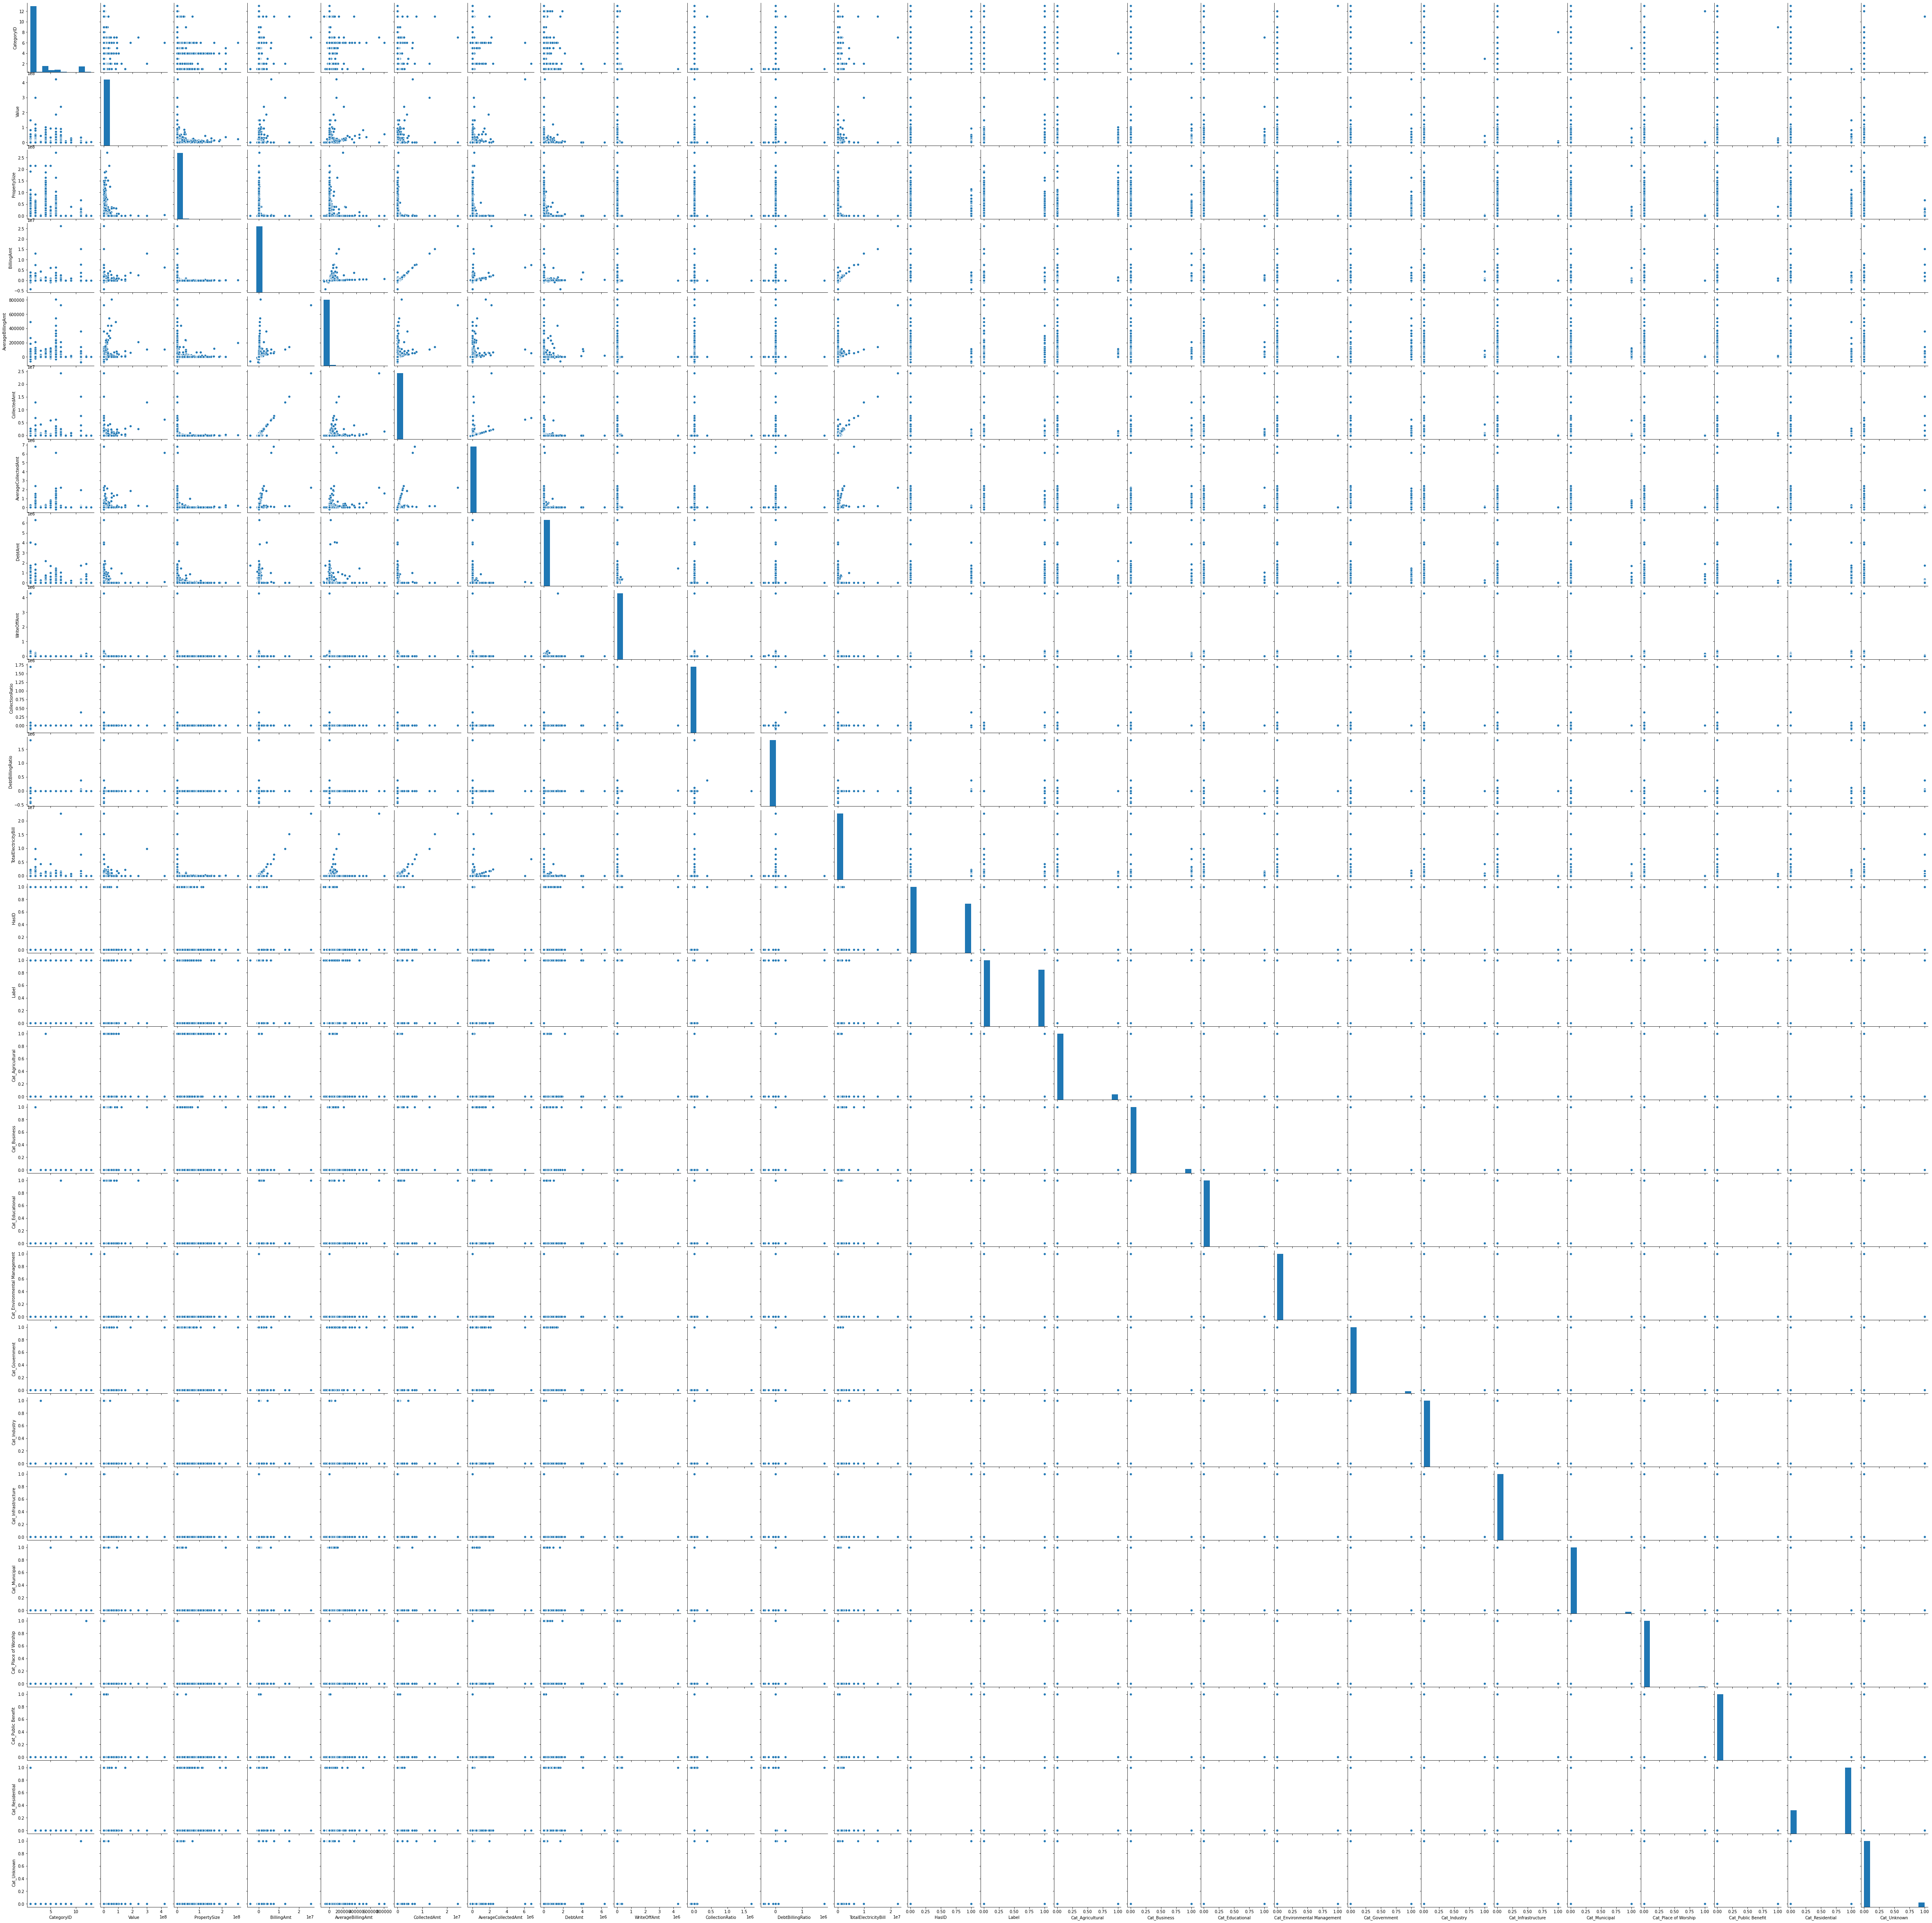

In [98]:
sns.pairplot(new_df)

### Splitting into train data and target data

In [99]:
X_train = new_df.drop(['Label'],axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100476 entries, c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a to c18b83ee-8bf0-49e8-98fa-09db6bd581c3
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CategoryID                    100476 non-null  int64  
 1   Value                         100476 non-null  int64  
 2   PropertySize                  100476 non-null  int64  
 3   BillingAmt                    100476 non-null  int64  
 4   AverageBillingAmt             100476 non-null  int64  
 5   CollectedAmt                  100476 non-null  int64  
 6   AverageCollectedAmt           100476 non-null  int64  
 7   DebtAmt                       100476 non-null  int64  
 8   WriteOffAmt                   100476 non-null  int64  
 9   CollectionRatio               100476 non-null  float64
 10  DebtBillingRatio              100476 non-null  float64
 11  TotalElectricityBill          100476 non-nul

In [100]:
#As test data has no use of this attribute so we drop it
X_train.drop('Cat_Environmental Management',axis=1,inplace=True)

In [101]:
y_train = new_df[['Label']]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100476 entries, c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a to c18b83ee-8bf0-49e8-98fa-09db6bd581c3
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Label   100476 non-null  int64
dtypes: int64(1)
memory usage: 4.0+ MB


### Making a Logistic Regression model

In [102]:
from sklearn.linear_model import LogisticRegression

#Making model object
log_model = LogisticRegression()

#Fitting the model
log_model.fit(X_train,y_train)

C:\Users\ybhat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ybhat\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### Test data cleaning

In [103]:
df_test = pd.read_csv('Test.csv')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33493 entries, 0 to 33492
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccID                 33493 non-null  object 
 1   CategoryID            33493 non-null  int64  
 2   Category              33493 non-null  object 
 3   Value                 33493 non-null  int64  
 4   PropertySize          33493 non-null  int64  
 5   BillingAmt            33493 non-null  int64  
 6   AverageBillingAmt     33493 non-null  int64  
 7   CollectedAmt          33493 non-null  int64  
 8   AverageCollectedAmt   33493 non-null  int64  
 9   DebtAmt               33493 non-null  int64  
 10  WriteOffAmt           33493 non-null  int64  
 11  CollectionRatio       33493 non-null  float64
 12  DebtBillingRatio      33493 non-null  float64
 13  TotalElectricityBill  33493 non-null  int64  
 14  HasID                 33493 non-null  int64  
dtypes: float64(2), int6

In [104]:
index_info = df_test['AccID']
df_test.set_index('AccID',inplace=True)

### Hot-encoding Category column in test data

In [106]:
df_enT = df_test['Category']
dummy_encoded_variables_test = pd.get_dummies(df_enT, prefix='Cat')
encoded_df_T = df_test.drop(['Category'],axis=1)
new_df_test = pd.concat([encoded_df_T,dummy_encoded_variables_test],axis=1)
new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33493 entries, d0390389-df62-4bf1-8659-bbc736ce777d to 3d97a35c-9a78-414c-9a62-35d60d38ad67
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CategoryID            33493 non-null  int64  
 1   Value                 33493 non-null  int64  
 2   PropertySize          33493 non-null  int64  
 3   BillingAmt            33493 non-null  int64  
 4   AverageBillingAmt     33493 non-null  int64  
 5   CollectedAmt          33493 non-null  int64  
 6   AverageCollectedAmt   33493 non-null  int64  
 7   DebtAmt               33493 non-null  int64  
 8   WriteOffAmt           33493 non-null  int64  
 9   CollectionRatio       33493 non-null  float64
 10  DebtBillingRatio      33493 non-null  float64
 11  TotalElectricityBill  33493 non-null  int64  
 12  HasID                 33493 non-null  int64  
 13  Cat_Agricultural      33493 non-null  uint8  
 14  Cat_Busin

### Predicting values

In [108]:
pred = log_model.predict(new_df_test)

In [110]:
#Converting the result into Dataframe
res1 = pd.DataFrame({'AccID':index_info,'Label':pred})

#Exporting the dataframe
res1.to_excel('PreFinal.xlsx')

### Improving model performance

In [111]:
from sklearn.preprocessing import StandardScaler

#Creating Scaler object
scaler = StandardScaler()

#Fitting the object with train data
scaler.fit(X_train)

#Transforming the data using scaler object
scaled_Train = scaler.transform(X_train)

In [114]:
#Making model object
Log_model_2 = LogisticRegression()

#Fitting the model
Log_model_2.fit(scaled_Train,y_train)

C:\Users\ybhat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ybhat\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [115]:
pred_new = Log_model_2.predict(new_df_test)

In [116]:
#Converting the result into Dataframe
res_new = pd.DataFrame({'AccID':index_info,'Label':pred_new})

#Exporting the dataframe
res_new.to_excel('Output_File.xlsx')